In [2]:
#source: https://arch.readthedocs.io/en/latest/univariate/univariate_volatility_modeling.html

import warnings
warnings.simplefilter('ignore')

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn
import datetime as dt
import arch.data.sp500

from arch import arch_model

seaborn.set_style('darkgrid')
plt.rc("figure", figsize=(16, 6))
plt.rc("savefig", dpi=90)
plt.rc("font",family="sans-serif")
plt.rc("font",size=14)

In [3]:
#carregando os dados

st = dt.datetime(1988, 1, 1)
en = dt.datetime(2018, 1, 1)
data = arch.data.sp500.load()
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-04,1229.229980,1248.810059,1219.099976,1228.099976,1228.099976,877000000
1999-01-05,1228.099976,1246.109985,1228.099976,1244.780029,1244.780029,775000000
1999-01-06,1244.780029,1272.500000,1244.780029,1272.339966,1272.339966,986900000
1999-01-07,1272.339966,1272.339966,1257.680054,1269.729980,1269.729980,863000000
1999-01-08,1269.729980,1278.239990,1261.819946,1275.089966,1275.089966,937800000
...,...,...,...,...,...,...
2018-12-24,2400.560059,2410.340088,2351.100098,2351.100098,2351.100098,2613930000
2018-12-26,2363.120117,2467.760010,2346.580078,2467.699951,2467.699951,4233990000
2018-12-27,2442.500000,2489.100098,2397.939941,2488.830078,2488.830078,4096610000


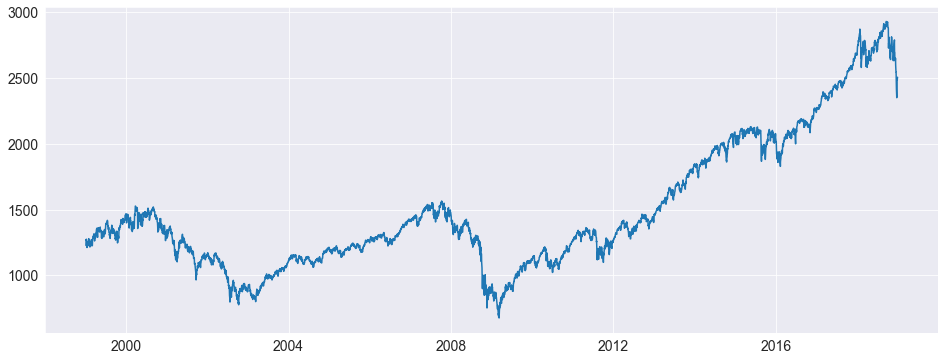

In [4]:
market = data['Adj Close']
plt.plot(market)

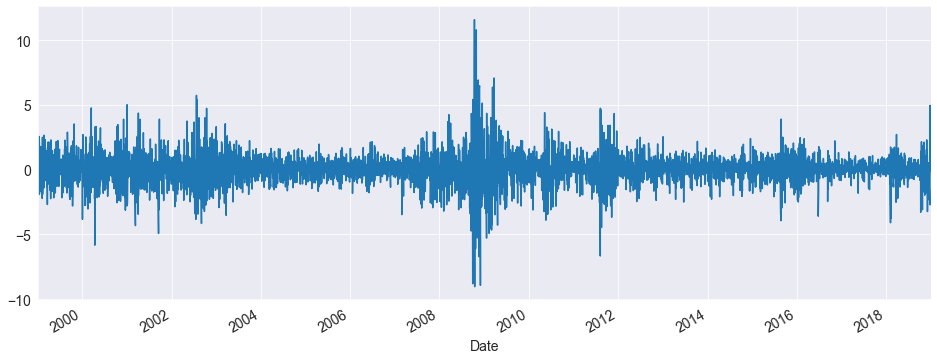

In [5]:
returns = 100 * market.pct_change().dropna()
ax = returns.plot()
xlim = ax.set_xlim(returns.index.min(), returns.index.max())

In [7]:
am = arch_model(returns, mean='ARX') #101
#separando até essa data e o resto ele faz o forecast
split_date = dt.datetime(2018,1,1) 
res = am.fit(last_obs=split_date)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 194213061736638.62
Iteration:      2,   Func. Count:     15,   Neg. LLF: 172546139.45046735
Iteration:      3,   Func. Count:     22,   Neg. LLF: 9625.539440279344
Iteration:      4,   Func. Count:     29,   Neg. LLF: 6663.281840026677
Iteration:      5,   Func. Count:     35,   Neg. LLF: 6662.1109420422645
Iteration:      6,   Func. Count:     41,   Neg. LLF: 6599.52374145483
Iteration:      7,   Func. Count:     47,   Neg. LLF: 6734.880003050111
Iteration:      8,   Func. Count:     53,   Neg. LLF: 6593.510263978642
Iteration:      9,   Func. Count:     58,   Neg. LLF: 6593.430234530297
Iteration:     10,   Func. Count:     63,   Neg. LLF: 6593.409973069218
Iteration:     11,   Func. Count:     68,   Neg. LLF: 6593.409107395877
Iteration:     12,   Func. Count:     73,   Neg. LLF: 6593.409085145629
Iteration:     13,   Func. Count:     77,   Neg. LLF: 6593.409085149758
Optimization terminated successfully    (Exit mode 0)
        

In [8]:
am

AR(constant: yes, lags: none, no. of exog: 0, volatility: GARCH(p: 1, q: 1), distribution: Normal distribution), id: 0x182b8a5dd00

<AxesSubplot:xlabel='Date'>

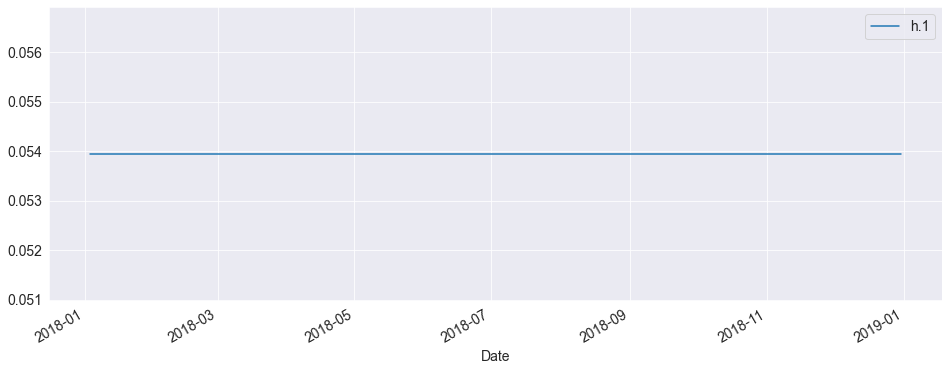

In [9]:
forecasts = res.forecast(start=split_date, align='target') #TARGET DÁ PARA O DIA
                                                            #ORIGIN DÁ PRA +1,...,+5 DIAS
                                                            #não faz sentido usr o horizon=5 se 
                                                            #usar target

#o que for predito
forecasts.mean[split_date:].plot()

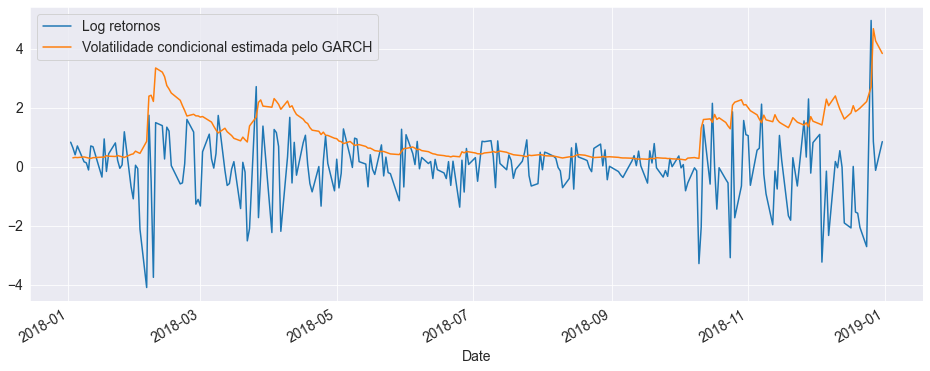

In [18]:
plt.plot(returns[split_date:], label='Log retornos')
forecasts.variance[split_date:]['h.1'].plot(label='Volatilidade condicional estimada pelo GARCH')
plt.legend(loc='best')
plt.savefig('fig/GARCH_ARX_vol_retorn.png')

In [11]:
from arch.univariate import ARX
arx = ARX( returns, lags=[1,3,12])

res_2 = arx.fit(last_obs=split_date, disp='off')

forecasts_2 = res_2.forecast(start=split_date, align='target') #TARGET DÁ PARA O DIA
                                                            #ORIGIN DÁ PRA +1,...,+5 DIAS
                                                            #não faz sentido usr o horizon=5 se 
                                                            #usar target

#o que for predito


#forecasts_2.mean[split_date:].plot()
#plt.plot(returns[split_date:])

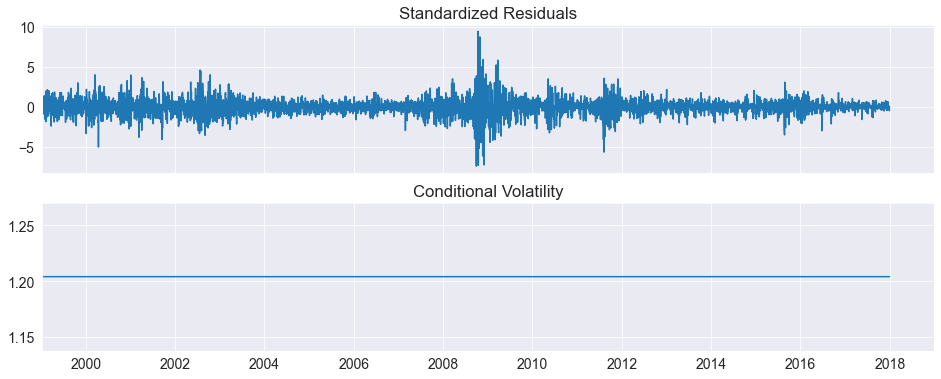

In [12]:
res_2.plot();

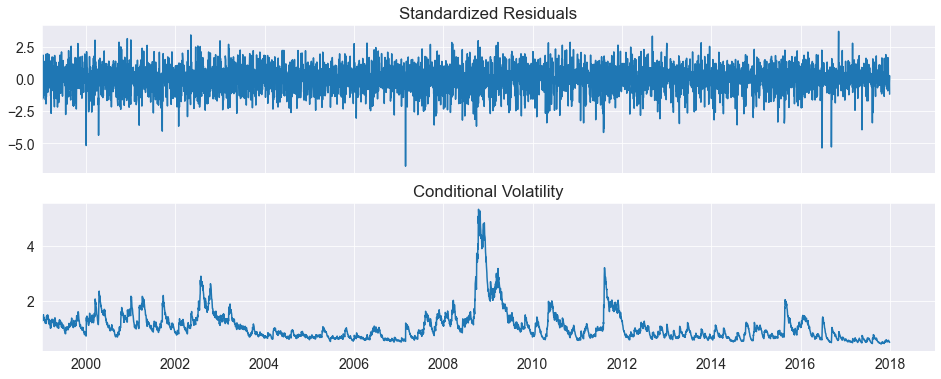

In [13]:
res.plot();